In [8]:
data = pd.read_excel("C://Users//abdul//Downloads//indian_liver_patient.xlsx")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
from sklearn.preprocessing import LabelEncoder
dummy = LabelEncoder()
data['Gender'] = dummy.fit_transform(data['Gender'])

In [10]:
data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [17]:
data['Disease'].value_counts()

Disease
1    416
0    167
Name: count, dtype: int64

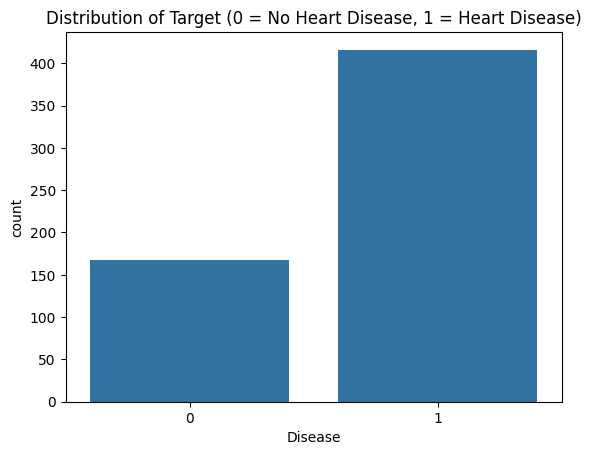

In [18]:
# Plot Target variable distribution
sns.countplot(x='Disease', data=data)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
dummy = LabelEncoder()
data['Gender'] = dummy.fit_transform(data['Gender'])

In [12]:
# Checking for missing values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Disease                       0
dtype: int64

In [13]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [14]:
# Checking for missing values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

In [17]:
data['Disease'].value_counts()

Disease
1    416
0    167
Name: count, dtype: int64

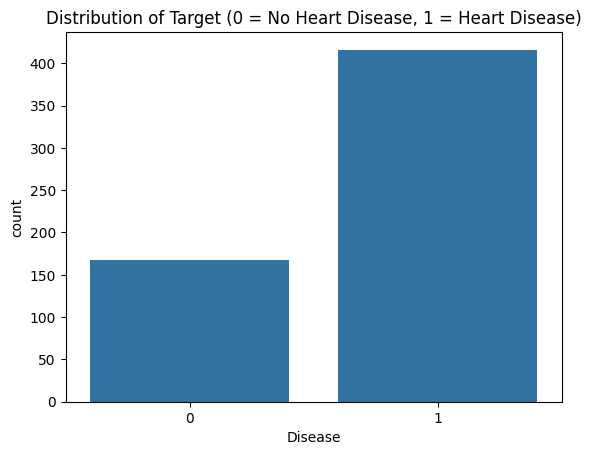

In [18]:
# Plot Target variable distribution
sns.countplot(x='Disease', data=data)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

# Data Splitting and Scaling

In [23]:
X = data.drop('Disease', axis=1)
y = data['Disease']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# balancing the TRAINING SET
import imblearn as imb
from imblearn.over_sampling import SMOTE
SMOTE = imb.over_sampling.SMOTE()
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

In [27]:
# train the model on the resmapled data

In [28]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([288, 288], dtype=int64))

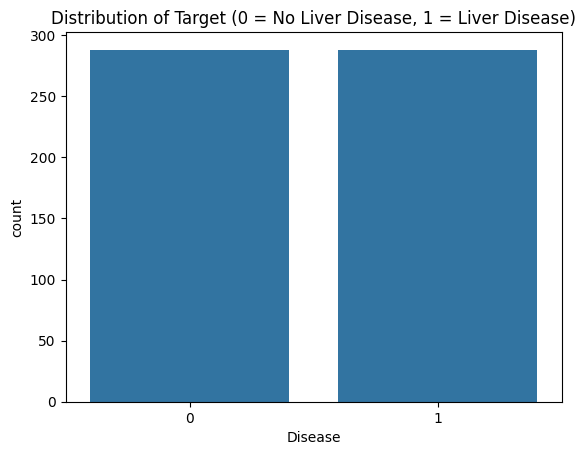

In [29]:
# Plot Target variable distribution
sns.countplot(x='Disease', data=pd.DataFrame(y_train))
plt.title('Distribution of Target (0 = No Liver Disease, 1 = Liver Disease)')
plt.show()